In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [3]:
metadata_df = pd.read_csv("../data/metadata_df_v4.csv")
metadata_df.head()

,chip_id,date,sample_id,type,x_center,y_center,epsg
0,00914_05_c_Q4_20171016,20171016,00914_05_c_Q4_20171016,control,607460.0,4628130.0,32630
1,00914_05_c_Q3_20170713,20170713,00914_05_c_Q3_20170713,control,607460.0,4628130.0,32630
2,00914_05_c_Q2_20170409,20170409,00914_05_c_Q2_20170409,control,607460.0,4628130.0,32630
3,00914_05_c_Q1_20170320,20170320,00914_05_c_Q1_20170320,control,607460.0,4628130.0,32630
4,00914_05_c_Q4_20191011,20191011,00914_05_c_Q4_20191011,control,607460.0,4628130.0,32630


In [4]:
metadata_df.value_counts("type")

type
control    16816
event       5672
Name: count, dtype: int64

In [5]:
gdf_list = []

for epsg_code, group in metadata_df.groupby("epsg"):
    # Build geodataframe for this EPSG
    gdf = gpd.GeoDataFrame(
        group,
        geometry=[Point(xy) for xy in zip(group.x_center, group.y_center)],
        crs=f"EPSG:{epsg_code}"
    )
    # Reproject to common CRS (WGS84)
    gdf = gdf.to_crs(epsg=4326)
    gdf_list.append(gdf)

# gdf_all = pd.concat(gdf_list).pipe(gpd.GeoDataFrame)
gdf_all = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs="EPSG:4326")
gdf_all.head()

,chip_id,date,sample_id,type,x_center,y_center,epsg,geometry
0,00800_14_e_Q2_20230421,20230421,00800_14_e_Q2_20230421,event,621910.0,6957460.0,32604,POINT (-156.61503 62.72728)
1,00800_14_e_Q1_20230215,20230215,00800_14_e_Q1_20230215,event,621910.0,6957460.0,32604,POINT (-156.61503 62.72728)
2,00800_13_e_Q2_20230421,20230421,00800_13_e_Q2_20230421,event,619670.0,6957460.0,32604,POINT (-156.65881 62.72802)
3,00800_13_e_Q1_20230215,20230215,00800_13_e_Q1_20230215,event,619670.0,6957460.0,32604,POINT (-156.65881 62.72802)
4,00800_11_e_Q2_20230421,20230421,00800_11_e_Q2_20230421,event,626390.0,6959700.0,32604,POINT (-156.5258 62.74585)


In [6]:
gdf_control = gdf_all[gdf_all["type"]=="control"]
gdf_event = gdf_all[gdf_all["type"]=="event"]
print(len(gdf_control))
print(len(gdf_event))

16816
5672


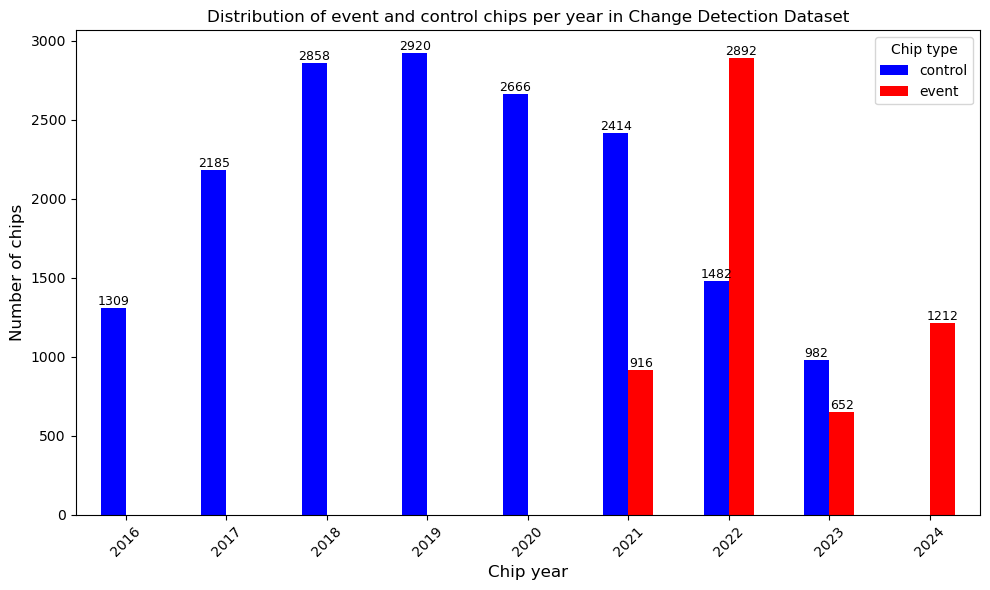

In [7]:
df = gdf_all.copy()
df["year"] = df["date"].astype(str).str[:4].astype(int)
counts = df.groupby(["year", "type"]).size().unstack(fill_value=0)
ax = counts.plot(
    kind="bar",
    figsize=(10, 6),
    color={"event": "red", "control": "blue"}
)

ax.set_title("Distribution of event and control chips per year in Change Detection Dataset")
ax.set_xlabel("Chip year", fontsize=12)
ax.set_ylabel("Number of chips", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Chip type")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f"{int(height)}",              
            (p.get_x() + p.get_width() / 2, height),
            ha="center", va="bottom", fontsize=9, color="black", rotation=0
        )

plt.tight_layout()
plt.show()

In [8]:
gdf_event.explore(
    column="type",
    categorical=True,
    legend=True,
    tooltip=["chip_id", "date", "type"],
    popup=True,
    marker_kwds=dict(radius=8, fill=True)
)

Image Statistics

In [ ]:
# TODO: Visualize histogram of per band images for event and control chips
# TODO: Compute the statistics (min, max, mean, std) for each band and visualize them
# TODO: Visualize random samples of aligned event and control chips with information on the pre and post event dates
# TODO: 